In [41]:

%matplotlib inline 
from os import listdir
from os.path import isfile, join
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
from matplotlib import pyplot as plt
import math
import gensim
import gensim.downloader
from gensim.models.fasttext import load_facebook_model
import warnings
warnings.filterwarnings('ignore')


In [42]:
ratings = pd.read_csv('../../data/uw_58_ratings_matrix_unscaled.csv')
ratings= ratings.rename(columns={"Unnamed: 0": "concepts"})

In [30]:
##what word embedding models are available?
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [31]:
# w2v_vecs = gensim.downloader.load('word2vec-google-news-300')
# ft_vecs = gensim.downloader.load('fasttext-wiki-news-subwords-300')

In [32]:
w2v_vecs = gensim.models.KeyedVectors.load_word2vec_format('/Users/kushin/gensim-data/word2vec-google-news-300/word2vec-google-news-300.gz', binary=True)

In [33]:
#gensim.models.fasttext.load_facebook_model('/Users/kushin/gensim-data/fasttext-wiki-news-subwords-300/fasttext-wiki-news-subwords-300.gz')


In [34]:
#gensim.models.fasttext.load

In [35]:
## Here's a 300 dim vector for a word

w2v_vecs['color']

array([-4.30297852e-03,  1.43554688e-01,  3.63769531e-02,  1.29882812e-01,
        1.27563477e-02, -1.92382812e-01,  3.06640625e-01, -2.49023438e-01,
        4.51660156e-02,  7.27539062e-02,  1.31835938e-01, -4.68750000e-02,
       -4.85839844e-02, -7.56835938e-02, -2.19726562e-03, -1.20117188e-01,
       -2.27539062e-01,  3.98437500e-01, -7.37304688e-02, -6.64062500e-01,
       -4.04296875e-01,  2.11181641e-02,  3.41796875e-02, -1.36718750e-01,
       -2.71484375e-01,  2.83203125e-02, -2.83203125e-01,  1.56250000e-01,
        1.20117188e-01, -6.83593750e-02, -4.04296875e-01,  2.14843750e-01,
       -4.15039062e-02,  1.24023438e-01, -9.03320312e-02,  5.49316406e-02,
        1.92871094e-02,  1.97753906e-02, -1.57226562e-01,  2.00195312e-02,
        1.52343750e-01, -3.61328125e-02,  1.26953125e-01, -1.36718750e-01,
        6.98242188e-02, -1.76757812e-01, -8.05664062e-02, -3.08593750e-01,
       -1.08398438e-01,  1.44531250e-01, -1.11816406e-01,  6.65283203e-03,
        1.14746094e-01, -

In [36]:
fic_vecs = gensim.models.KeyedVectors.load_word2vec_format('../../data/fic.en.vec')

In [37]:
concept_list = ratings['concepts'].values
concept_list

array(['dress', 'pants', 'shirt', 'shoes', 'socks', 'above', 'below',
       'beside', 'far', 'near', 'angry', 'disgust', 'fearful', 'happy',
       'sad', 'blueberry', 'lemon', 'mango', 'strawberry', 'watermelon',
       'beach', 'field', 'ocean', 'sky', 'sunset', 'dawn', 'day', 'dusk',
       'night', 'noon'], dtype=object)

In [38]:
#w2v_reps = np.hstack([concept_list.reshape(30,1),w2v_vecs[concept_list]] )
w2v_reps =w2v_vecs[concept_list]

fic_reps = fic_vecs[concept_list]

Text(0.5, 1.0, 'fiction cor matrix')

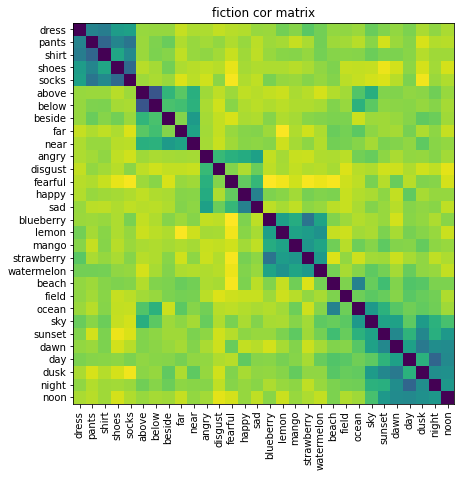

In [89]:
plt.figure(figsize=(10,7))
plt.imshow(np.corrcoef(fic_reps), cmap='viridis_r')
plt.yticks(ticks = range(30),labels = list(concept_list))
plt.xticks(ticks = range(30),labels = list(concept_list), rotation=90)
plt.title('fiction cor matrix')

Text(0.5, 1.0, 'word2vec cor matrix')

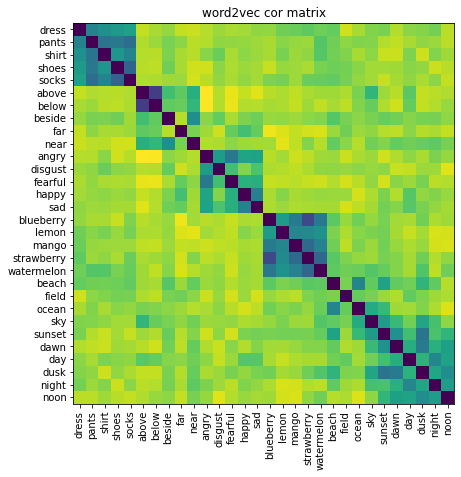

In [90]:
plt.figure(figsize=(10,7))
plt.imshow(np.corrcoef(w2v_reps), cmap= 'viridis_r')
plt.yticks(ticks = range(30),labels = list(concept_list))
plt.xticks(ticks = range(30),labels = list(concept_list), rotation=90)
plt.title('word2vec cor matrix')

Text(0.5, 1.0, 'colorconcept assoc cor matrix')

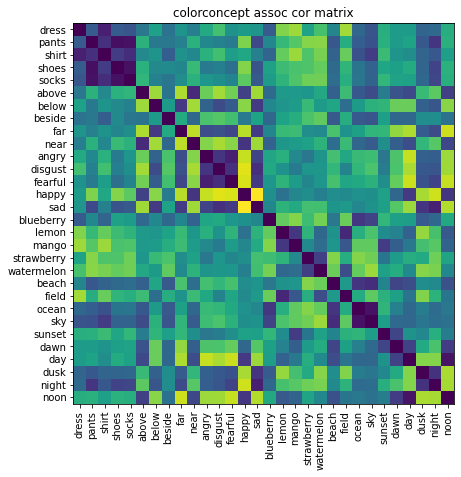

In [92]:
plt.figure(figsize=(10,7))
plt.imshow(np.corrcoef(ratings.iloc[:,1:]), cmap='viridis_r')
plt.yticks(ticks = range(30),labels = list(concept_list))
plt.xticks(ticks = range(30),labels = list(concept_list), rotation=90)
plt.title('colorconcept assoc cor matrix')

In [50]:

w2v_df = pd.concat([pd.DataFrame(concept_list.reshape(30,1), columns = {'concepts'}),pd.DataFrame(w2v_reps)], axis=1)
fic_df = pd.concat([pd.DataFrame(concept_list.reshape(30,1), columns = {'concepts'}),pd.DataFrame(fic_reps)], axis=1)


In [51]:
c_means = pd.read_csv('../../data/col_means.csv')

ratings_c = ratings.iloc[:,1:] - c_means.V1.values

In [52]:
u, s, vt = np.linalg.svd(ratings_c,full_matrices=False)

<BarContainer object of 30 artists>

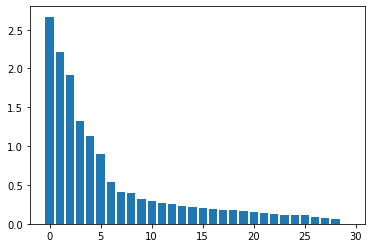

In [53]:
plt.bar(np.arange(len(s)),s)

In [54]:
s = np.diag(s)

In [55]:
#ratings = pd.concat([ratings, pd.DataFrame(u[:,:3]@s[:3,:3], columns = ['c1','c2','c3'])], axis=1)
#ratings = pd.concat([ratings, pd.DataFrame(u[:,:3], columns = ['c1','c2','c3'])], axis=1)

In [56]:
ratings_pc_df = pd.concat ( [pd.DataFrame({'concepts':concept_list,'c1':u[:,0],'c2':u[:,1],'c3':u[:,2]}), ratings_c],axis=1)


Text(0.5, 0.92, 'color-concept association space')

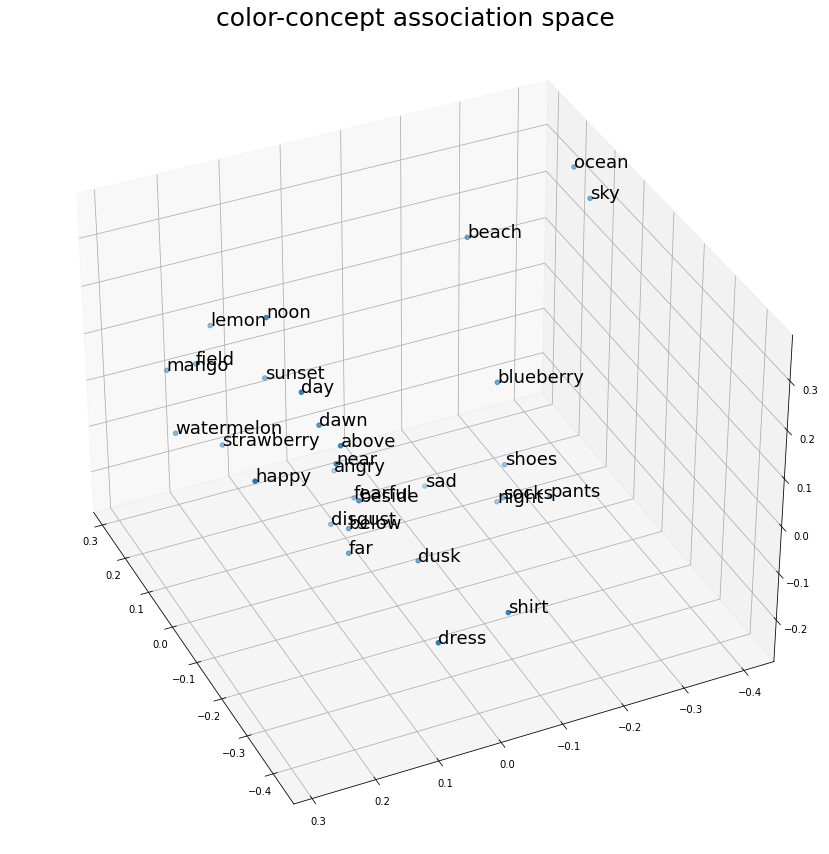

In [57]:
fig= plt.figure(figsize=(15,15))
ax = plt.axes(projection='3d')
ax.view_init(35, 155)
#sns.scatterplot(x='c2',y='c3',hue='concepts',data=w2v_df,legend =False)

ax.scatter3D( ratings_pc_df['c1'], ratings_pc_df['c2'], ratings_pc_df['c3'])
for i, txt in enumerate(ratings_pc_df['concepts']):
    ax.text(ratings_pc_df['c1'].iloc[i],ratings_pc_df['c2'].iloc[i], ratings_pc_df['c3'].iloc[i], txt, fontsize=18)
plt.title('color-concept association space', fontsize=25)

In [58]:
w2v_reps_c = w2v_df.iloc[:,1:].apply(lambda x: x- x.mean())
w2v_reps_c_means = w2v_df.iloc[:,1:].mean(axis = 0).values



In [59]:
w2v_reps_c = w2v_reps_c.add_suffix('_w')


<BarContainer object of 30 artists>

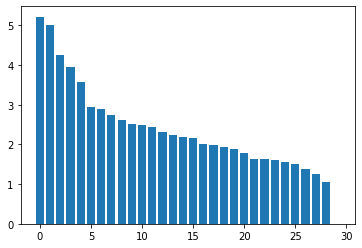

In [60]:
##plot the eigenvalues in a way that makes it clear that there's at least some low rank and a principled way to select the top few principal components
u_2, s_2, vt_2 = np.linalg.svd(w2v_reps_c,full_matrices=False)
plt.bar(np.arange(len(s_2)),s_2)

In [61]:
s_2 = np.diag(s_2)
#w2v_df = pd.concat([w2v_df, pd.DataFrame(u_2[:,:3]@s_2[:3,:3], columns = ['c1','c2','c3'])], axis=1)
#w2v_df = pd.concat([w2v_df, pd.DataFrame(u_2[:,:3], columns = ['c1','c2','c3'])], axis=1)

In [1]:
w2v_pc_df = pd.concat ( [pd.DataFrame({'concepts':concept_list,'c1':u_2[:,0],'c2':u_2[:,1],'c3':u_2[:,2]}), w2v_reps_c],axis=1)
1/(1+np.ex(-1))

NameError: name 'pd' is not defined

Text(0.5, 0.92, 'word2vec space')

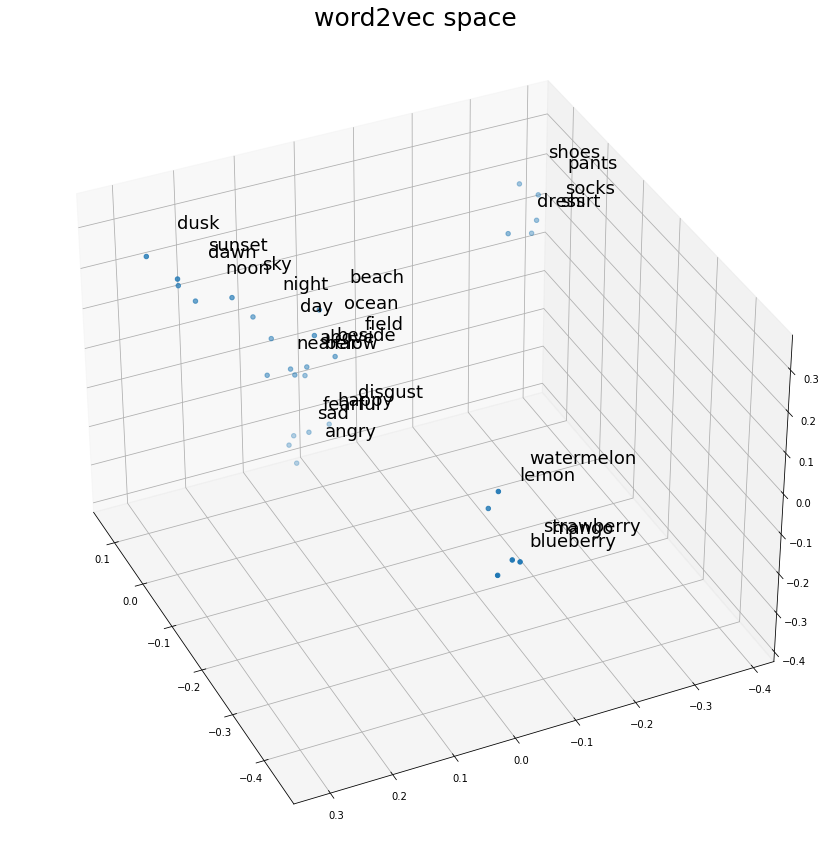

In [63]:
fig= plt.figure(figsize=(15,15))

ax = plt.axes(projection='3d')
ax.view_init(35, 155)
#sns.scatterplot(x='c2',y='c3',hue='concepts',data=w2v_df,legend =False)

ax.scatter3D( w2v_pc_df['c1'], w2v_pc_df['c2'], w2v_pc_df['c3'])
for i, txt in enumerate(w2v_pc_df['concepts']):
    ax.text(w2v_pc_df['c1'].iloc[i],w2v_pc_df['c2'].iloc[i]-0.05, w2v_pc_df['c3'].iloc[i]+.05, txt, fontsize=18)
plt.title('word2vec space', fontsize=25)

In [64]:
fic_reps_c = fic_df.iloc[:,1:].apply(lambda x: x- x.mean())
fic_reps_c_means = fic_df.iloc[:,1:].mean(axis = 0).values

In [65]:
fic_reps_c = fic_reps_c.add_suffix('_f')


<BarContainer object of 30 artists>

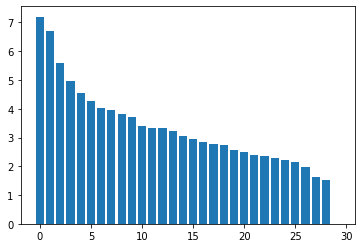

In [66]:
u_3, s_3, vt_3 = np.linalg.svd(fic_reps_c,full_matrices=False)
plt.bar(np.arange(len(s_3)),s_3)

In [67]:
fic_pc_df = pd.concat ( [pd.DataFrame({'concepts':concept_list,'c1':u_3[:,0],'c2':u_3[:,1],'c3':u_3[:,2]}), fic_reps_c],axis=1)


Text(0.5, 0.92, 'fiction embedding space')

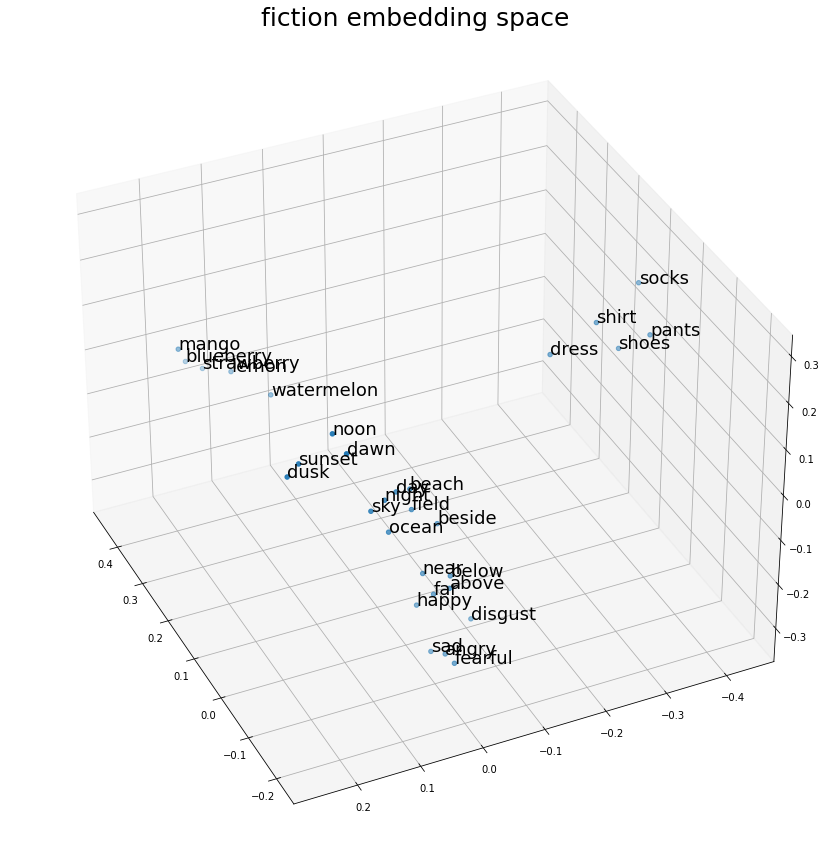

In [68]:
fig= plt.figure(figsize=(15,15))
ax = plt.axes(projection='3d')
ax.view_init(35, 155)
#sns.scatterplot(x='c2',y='c3',hue='concepts',data=w2v_df,legend =False)

ax.scatter3D( fic_pc_df['c1'], fic_pc_df['c2'], fic_pc_df['c3'])
for i, txt in enumerate(fic_pc_df['concepts']):
    ax.text(fic_pc_df['c1'].iloc[i],fic_pc_df['c2'].iloc[i], fic_pc_df['c3'].iloc[i], txt, fontsize=18)
plt.title('fiction embedding space', fontsize=25)

In [69]:
reg_df = pd.concat([pd.Series(concept_list,name='concepts'),ratings_c,w2v_reps_c, fic_reps_c,ratings_pc_df[['c1','c2','c3']]],axis=1)

In [70]:
reg_df.shape

(30, 662)

In [71]:
reg_df.to_csv('../../data/reg_df.csv',index=False)


In [72]:
pred_coords_w2v = pd.read_csv('../../data/w2v_predicted_coords.csv')
pred_coords_fic = pd.read_csv('../../data/fic_predicted_coords.csv')

Text(0.5, 0.92, 'Predicted coordinates w2v')

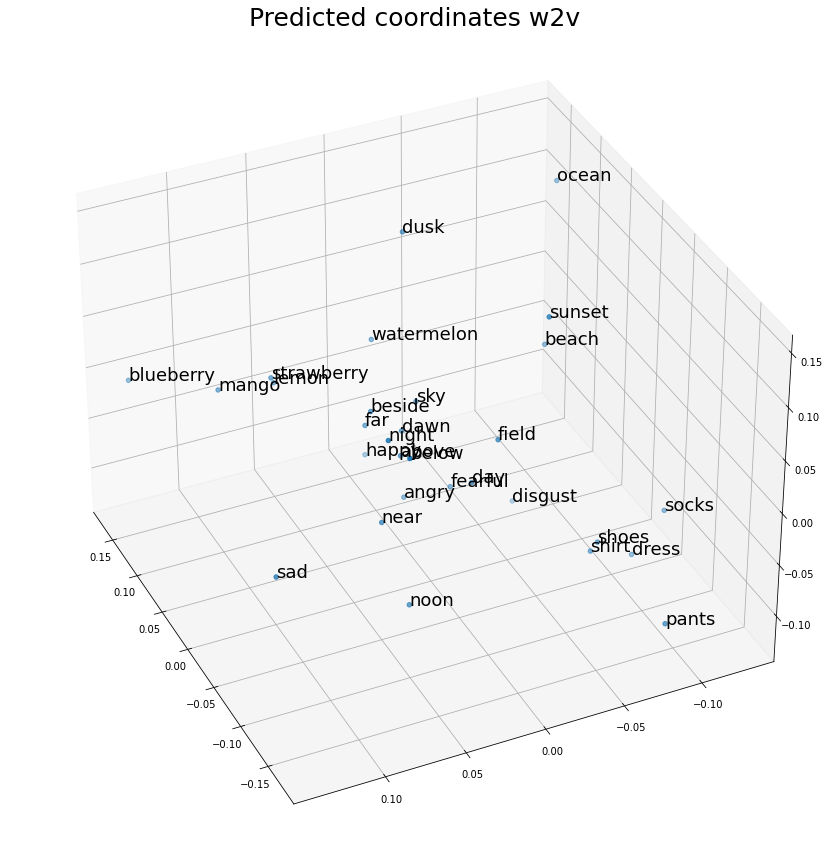

In [73]:
fig= plt.figure(figsize=(15,15))

ax = plt.axes(projection='3d')
#ax.view_init(30, 210)
ax.view_init(35, 155)
#sns.scatterplot(x='c2',y='c3',hue='concepts',data=w2v_df,legend =False)

ax.scatter3D( pred_coords_w2v['c1_pred'], pred_coords_w2v['c2_pred'], pred_coords_w2v['c3_pred'])
for i, txt in enumerate(pred_coords_w2v['concepts']):
    ax.text(pred_coords_w2v['c1_pred'].iloc[i],pred_coords_w2v['c2_pred'].iloc[i], pred_coords_w2v['c3_pred'].iloc[i], txt, fontsize=18)
plt.title('Predicted coordinates w2v', fontsize=25)



Text(0.5, 0.92, 'Predicted coordinates fiction')

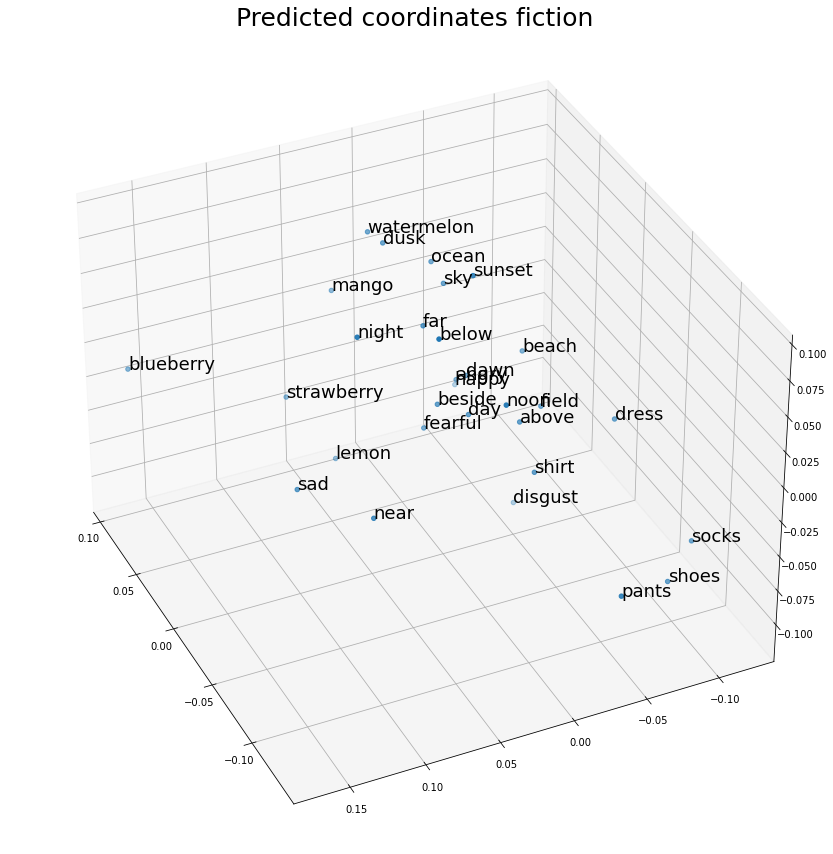

In [74]:
fig= plt.figure(figsize=(15,15))

ax = plt.axes(projection='3d')
#ax.view_init(30, 210)
ax.view_init(35, 155)
#sns.scatterplot(x='c2',y='c3',hue='concepts',data=w2v_df,legend =False)

ax.scatter3D( pred_coords_fic['c1_pred'], pred_coords_fic['c2_pred'], pred_coords_fic['c3_pred'])
for i, txt in enumerate(pred_coords_fic['concepts']):
    ax.text(pred_coords_fic['c1_pred'].iloc[i],pred_coords_fic['c2_pred'].iloc[i], pred_coords_fic['c3_pred'].iloc[i], txt, fontsize=18)
plt.title('Predicted coordinates fiction', fontsize=25)


In [75]:
w2v_vecs.similar_by_word("color")

[('colors', 0.6966161727905273),
 ('Color', 0.6928340196609497),
 ('TEXOMA_Water', 0.6742743849754333),
 ('RICHLAND_CHAMBERS_Water', 0.6476083993911743),
 ('vibrant_colors', 0.6224876046180725),
 ('hues', 0.613426148891449),
 ('color_palette', 0.6065829992294312),
 ('blues_grays', 0.5998265743255615),
 ('browns_grays', 0.5963162779808044),
 ('colored', 0.5960178971290588)]

In [ ]:
ft_vecs.similar_by_word("color")

In [10]:
import numpy as np
a = np.random.rand(2,2)


In [20]:
a@a.T
x = np.random.rand(2,1)

In [26]:
(a@x).T@(a@x)

array([[0.35917143]])

array([[0.58506301],
       [0.12989498]])